In [1]:
from scipy import signal
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [20]:
print("\nAGV-book.tex Copyright (c) 2020 Joshua A. Marshall")
print("Example adapted from oneD_discrete_control.py to perform different tests")
print("Software is licensed under the MIT License\n")


AGV-book.tex Copyright (c) 2020 Joshua A. Marshall
Example adapted from oneD_discrete_control.py to perform different tests
Software is licensed under the MIT License



In [3]:
# Set some variables that describe the desired behaviour 
_range  = np.arange(0.25,2,0.5)
_opts   = list(permutations(_range,2))
zeta    = [z for z,_ in _opts]
omega_n = [o for _,o in _opts]

In [4]:
# Define the sample time [s]
T = 0.5

In [5]:
# Compute the poles locations
lambda_s = [np.roots([1, 2*zeta[i]*omega_n[i], omega_n[i]**2]) for i in range(len(_opts))]
lambda_z = [np.exp(lambda_s[i]*T) for i in range(len(lambda_s))]

In [6]:
# Define the vehicle mass [kg]
m = 10

In [7]:
# Define the system matrices
F = np.array([[1, T],[0, 1]])
G = np.array([[T**2/(2*m)],[T/m]])

In [8]:
# Find gain matrix K that places the poles at lambda_z
K = [signal.place_poles(F, G, lambda_z[i]) for i in range(len(lambda_z))]

In [9]:
# Function that models the vehicle in discrete time
def vehicle(x, u, F, G):
    x_new = F @ x + G @ [u]
    return x_new

In [10]:
# Function that compute the control signal given the current state
def controller(x, K):
    u = -K @ x
    return u

In [11]:
# Create an array of time values [s]
simtime = 30
t = np.arange(0, simtime, T)
N = np.size(t)

In [12]:
# Initialize arrays that will be populated with our inputs and states
x = np.zeros((2, N, len(K)))
u = np.zeros((N,len(K)))

In [13]:
# Set the initial position [m], velocity [m/s], and force input [N]
x[0, 0] = 1.0
x[1, 0] = 0.0
u[0] = 0.0

In [14]:
# Run the simulation
for l in range(len(K)):
    for k in range(1, N):
        x[:, k, l] = vehicle(x[:, k-1, l], u[k-1, l], F, G)
        u[k, l] = controller(x[:, k, l], K[l].gain_matrix)

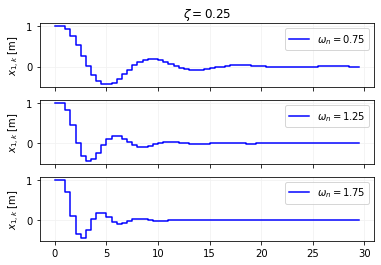

In [15]:
# Plot the states (x) and input (u) vs time (t)
fig1 = plt.figure(1)
ax1a = plt.subplot(311)
plt.step(t, x[0, :, 0], 'b', where='post',label=r'$\omega_n=0.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.title(r'$\zeta = 0.25$')
ax1b = plt.subplot(312)
plt.step(t, x[0, :, 1], 'b', where='post',label=r'$\omega_n=1.25$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(313)
plt.step(t, x[0, :, 2], 'b', where='post',label=r'$\omega_n=1.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.legend();

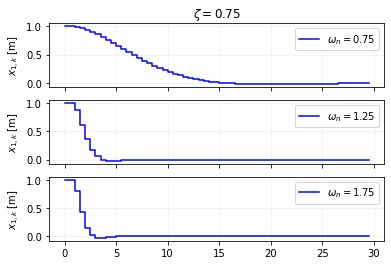

In [16]:
# Plot the states (x) and input (u) vs time (t)
fig1 = plt.figure(1)
ax1a = plt.subplot(311)
plt.step(t, x[0, :, 3], 'b', where='post',label=r'$\omega_n=0.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.title(r'$\zeta = 0.75$')
ax1b = plt.subplot(312)
plt.step(t, x[0, :, 4], 'b', where='post',label=r'$\omega_n=1.25$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(313)
plt.step(t, x[0, :, 5], 'b', where='post',label=r'$\omega_n=1.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.legend();

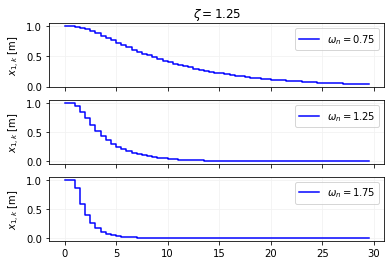

In [17]:
# Plot the states (x) and input (u) vs time (t)
fig1 = plt.figure(1)
ax1a = plt.subplot(311)
plt.step(t, x[0, :, 6], 'b', where='post',label=r'$\omega_n=0.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.title(r'$\zeta = 1.25$')
ax1b = plt.subplot(312)
plt.step(t, x[0, :, 7], 'b', where='post',label=r'$\omega_n=1.25$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(313)
plt.step(t, x[0, :, 8], 'b', where='post',label=r'$\omega_n=1.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.legend();

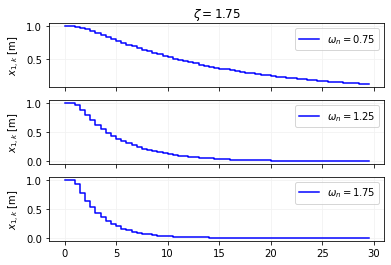

In [18]:
# Plot the states (x) and input (u) vs time (t)
fig1 = plt.figure(1)
ax1a = plt.subplot(311)
plt.step(t, x[0, :, 9], 'b', where='post',label=r'$\omega_n=0.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.title(r'$\zeta = 1.75$')
ax1b = plt.subplot(312)
plt.step(t, x[0, :, 10], 'b', where='post',label=r'$\omega_n=1.25$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.setp(ax1a, xticklabels=[])
plt.legend()
plt.setp(ax1b, xticklabels=[])
ax1c = plt.subplot(313)
plt.step(t, x[0, :, 11], 'b', where='post',label=r'$\omega_n=1.75$')
plt.grid(color='0.95')
plt.ylabel(r'$x_{1,k}$ [m]')
plt.legend();